<a href="https://colab.research.google.com/github/Morshed2550/test/blob/main/thesis_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import os
import pathlib
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model, callbacks
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Convolution2D,Activation,Flatten,Dense,Dropout,MaxPool2D,BatchNormalization

In [5]:
data = '/content/drive/MyDrive/Thesis/Rice'

In [6]:
classes=[]
for file in os.listdir(data):
    classes+=[file]
print(classes)
print(len(classes))

['Leaf smut', 'Brown spot', 'Bacterial leaf blight', 'Healthy']
4


In [7]:
brownspot = [data + '/Brown spot/' + img for img in os.listdir(data + '/Brown spot')[:9]]
leafblight = [data  + '/Bacterial leaf blight/' + img for img in os.listdir(data + '/Bacterial leaf blight')[:9]]
leafsmut = [data  + '/Leaf smut/' + img for img in os.listdir(data + '/Leaf smut')[:9]]
healthy = [data  + '/Healthy/' + img for img in os.listdir(data + '/Healthy')[:9]]

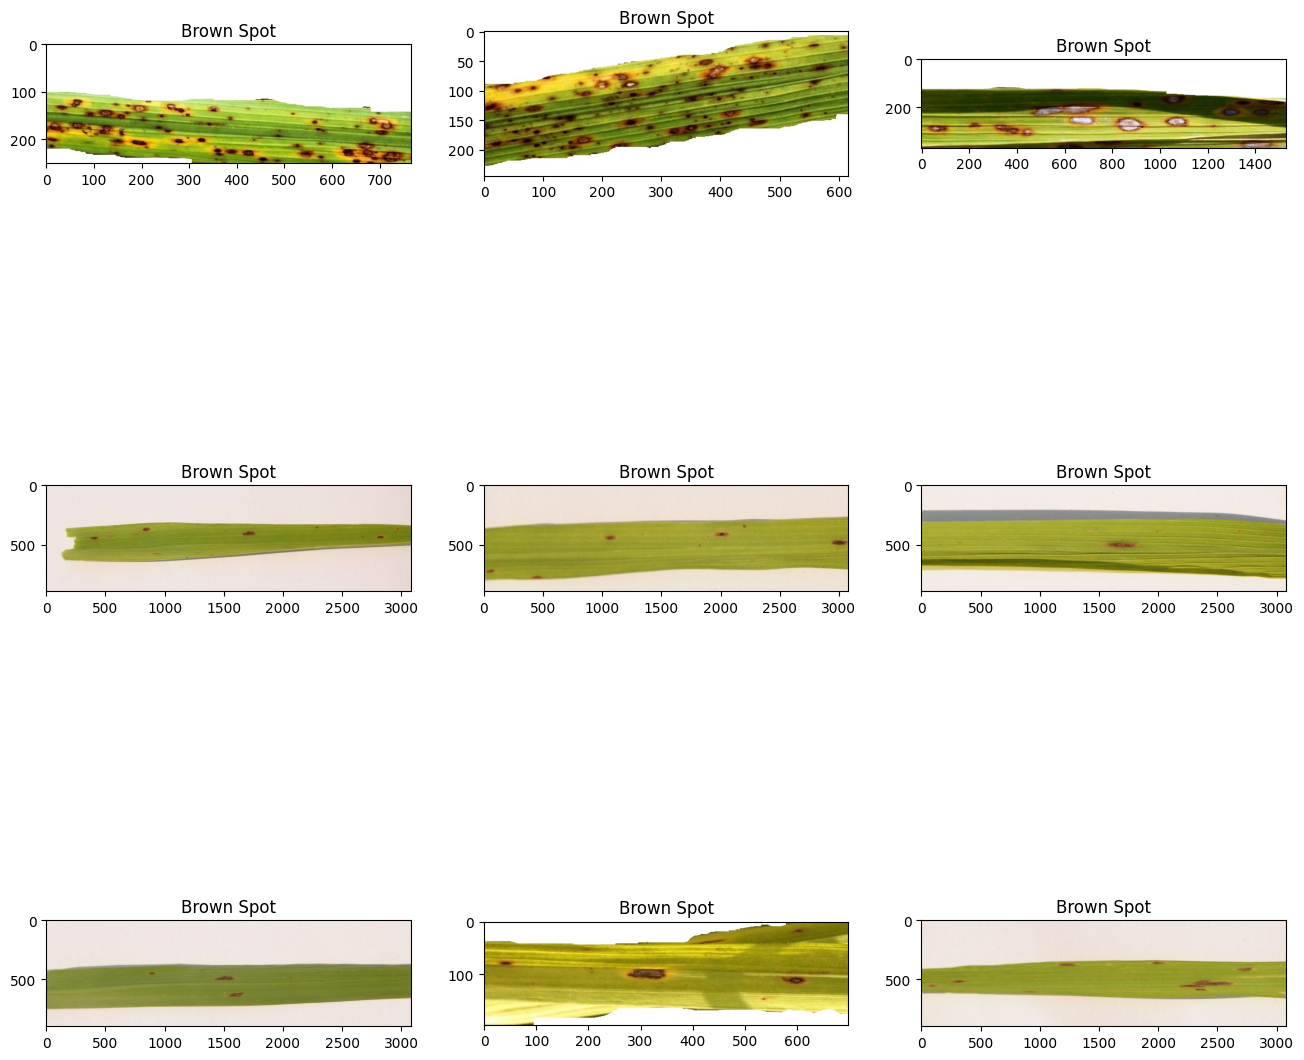

In [9]:
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(brownspot):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Brown Spot")


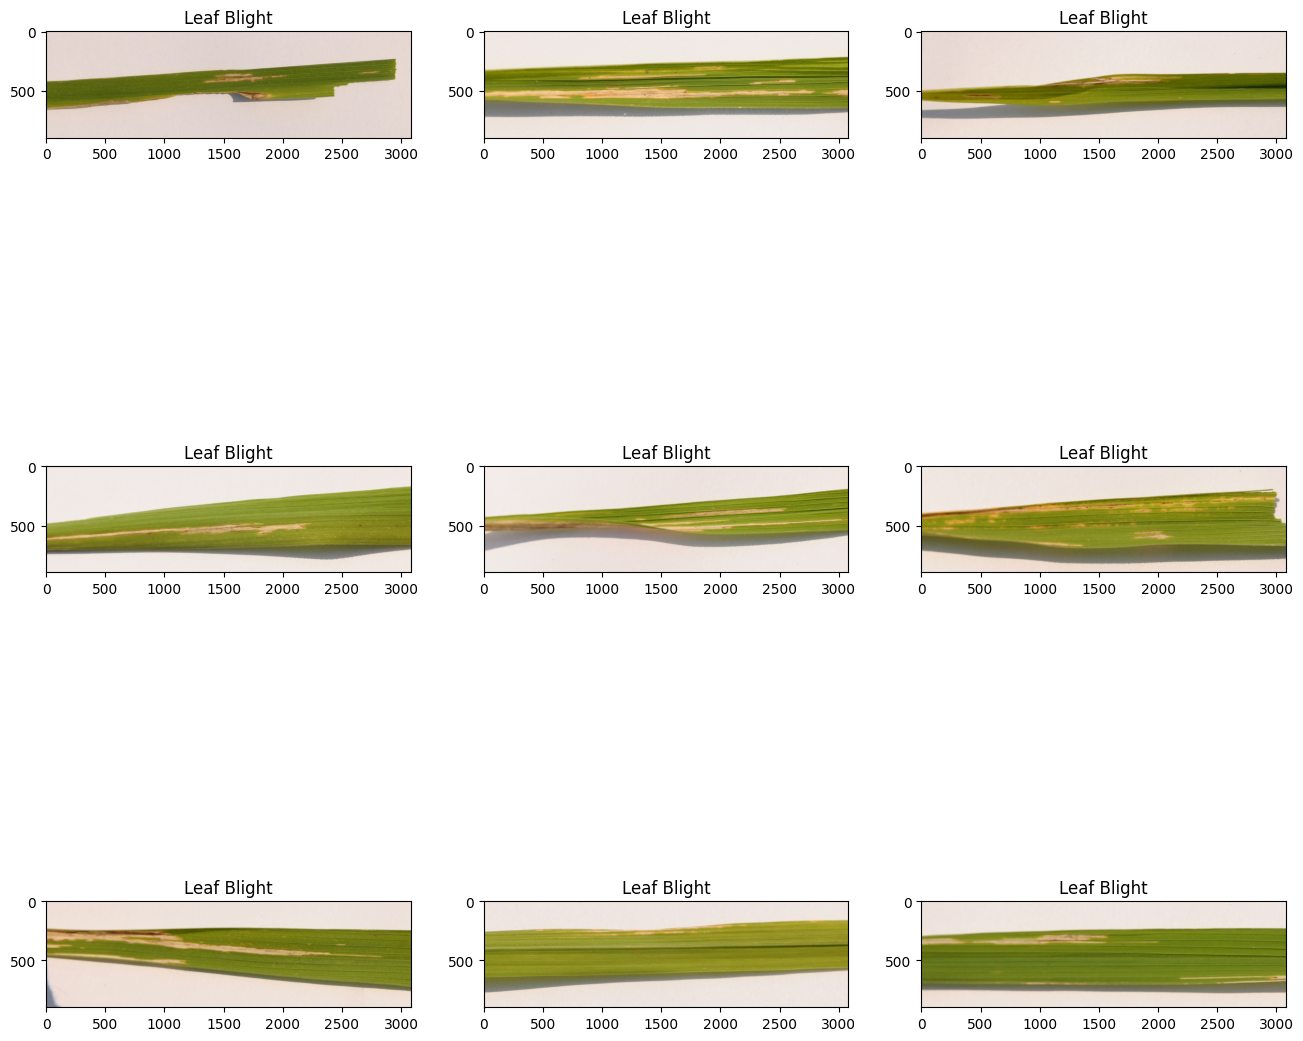

In [10]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(leafblight):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Leaf Blight")

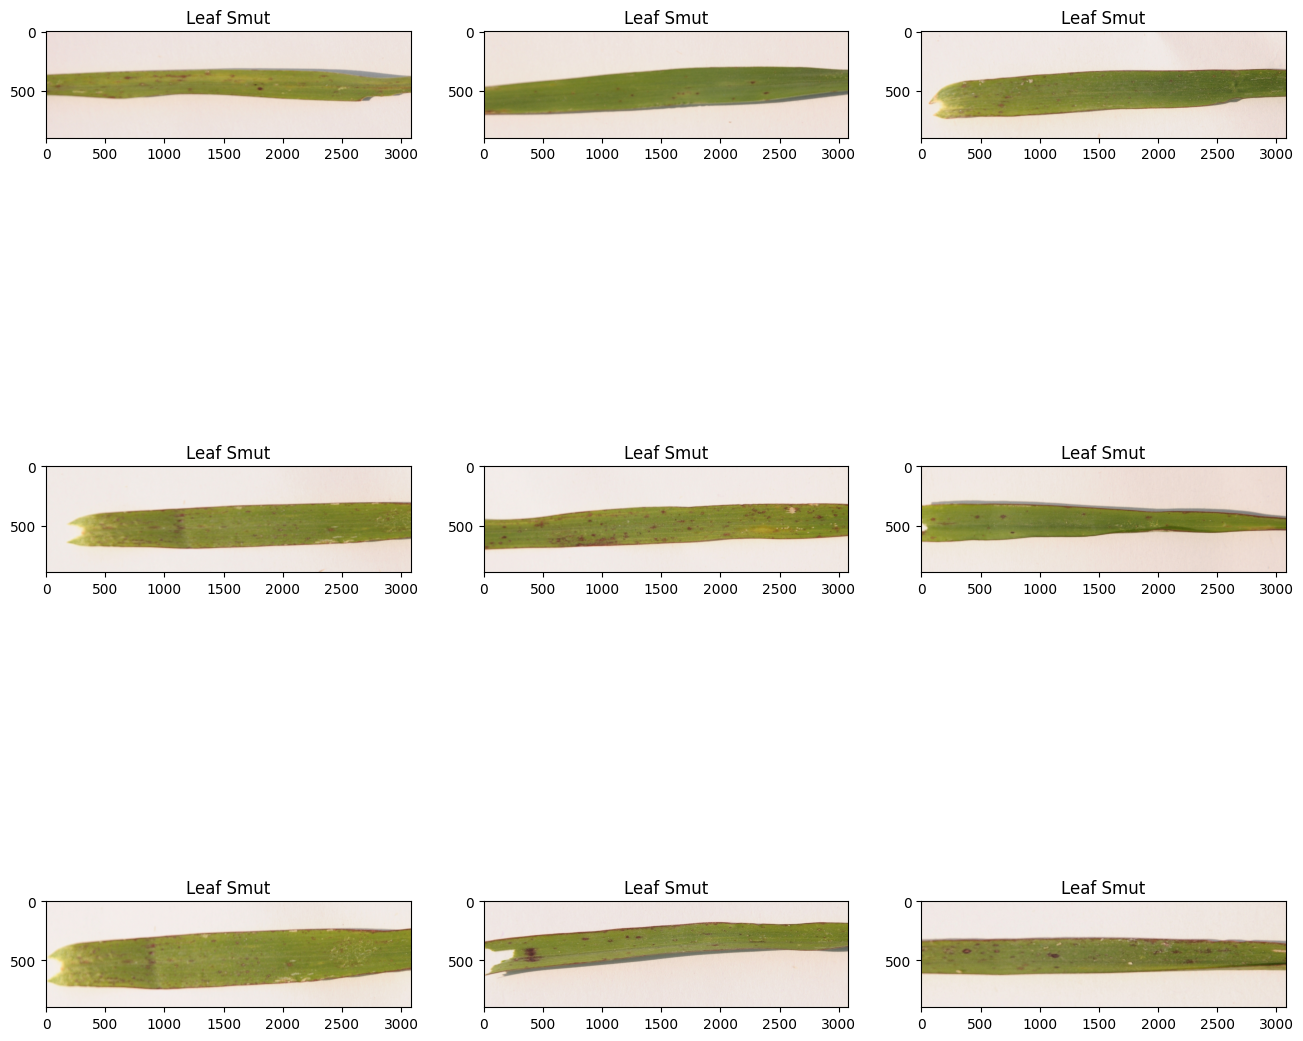

In [11]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(leafsmut):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Leaf Smut")


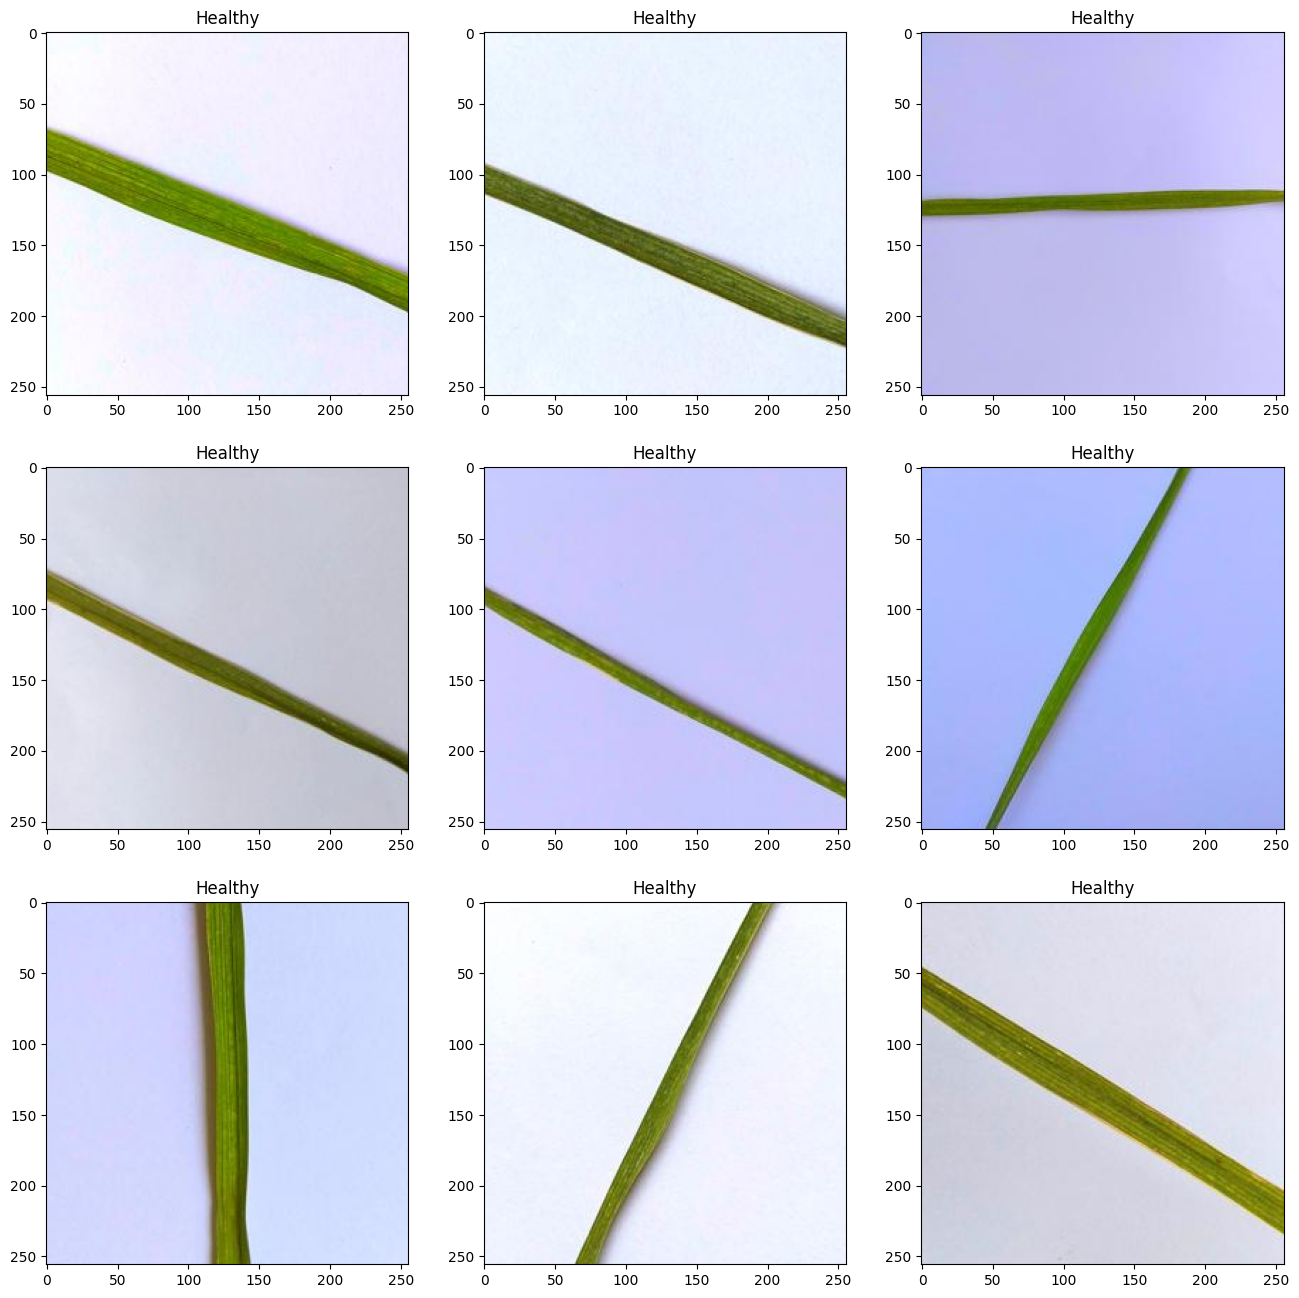

In [12]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(healthy):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Healthy")

In [13]:
dataGenerator = ImageDataGenerator(rescale= 1. / 255, validation_split=0.2)
train_data = dataGenerator.flow_from_directory(
    data,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical',
    shuffle=True,
    subset = 'training'
)
val_data = dataGenerator.flow_from_directory(
    data,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical',
    shuffle=True,
    subset = 'validation'
)

Found 161 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [14]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), padding='same', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Conv2D(128, kernel_size=(3,3), padding='same', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Conv2D(256, kernel_size=(3,3), padding='same', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Conv2D(512, kernel_size=(3,3), padding='same', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3, 3)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 74, 74, 128)      5

In [15]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [16]:
history = model.fit(train_data,validation_data=val_data,epochs=20)


Epoch 1/20
3/3 [==============================] - 84s 30s/step - loss: 2.7239 - accuracy: 0.3540 - val_loss: 1.3097 - val_accuracy: 0.4000
Epoch 2/20
3/3 [==============================] - 51s 16s/step - loss: 0.8717 - accuracy: 0.6149 - val_loss: 1.2948 - val_accuracy: 0.4000
Epoch 3/20
3/3 [==============================] - 54s 16s/step - loss: 0.7909 - accuracy: 0.6708 - val_loss: 1.2868 - val_accuracy: 0.4000
Epoch 4/20
3/3 [==============================] - 52s 16s/step - loss: 0.5836 - accuracy: 0.7702 - val_loss: 1.2415 - val_accuracy: 0.4250
Epoch 5/20
3/3 [==============================] - 51s 16s/step - loss: 0.4936 - accuracy: 0.7888 - val_loss: 1.1689 - val_accuracy: 0.4750
Epoch 6/20
3/3 [==============================] - 53s 17s/step - loss: 0.4518 - accuracy: 0.7888 - val_loss: 1.1755 - val_accuracy: 0.4500
Epoch 7/20
3/3 [==============================] - 49s 20s/step - loss: 0.3737 - accuracy: 0.8199 - val_loss: 1.1674 - val_accuracy: 0.4750
Epoch 8/20
3/3 [===========

In [17]:
def plot_training_curves(history_df):
    plt.figure(figsize = (13, 4), dpi = 120)
    ax = plt.subplot(1, 2, 1)
    plt.plot(range(1, len(history_df) + 1), history_df['loss'], marker = '.', label = 'Training Loss')
    plt.plot(range(1, len(history_df) + 1), history_df['val_loss'], marker = '^', label = 'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy')
    plt.grid()
    plt.legend()
    ax = plt.subplot(1, 2, 2)
    plt.plot(range(1, len(history_df) + 1), history_df['accuracy'], marker = '.', label = 'Training Accuracy')
    plt.plot(range(1, len(history_df) + 1), history_df['val_accuracy'], marker = '^', label = 'Validation Accurcay')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
    plt.show()

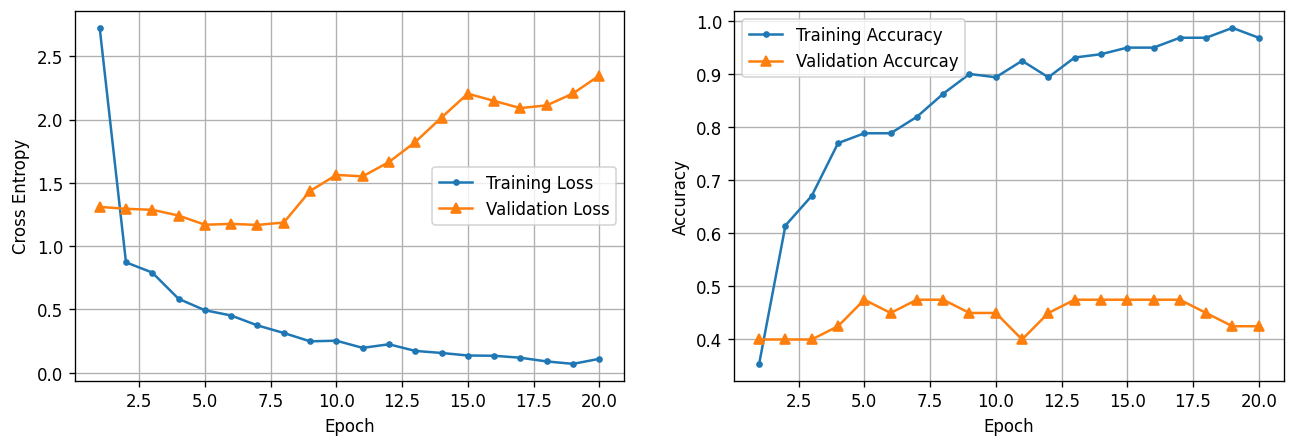

In [18]:
plot_training_curves(pd.DataFrame(history.history))